In [24]:
import numpy as np
from scipy.integrate import solve_ivp

#Definimos la ecuación diferencial y realizamos un cambio de variable para resolver ecuaciones diferenciales de primer orden. 
def schrodinger(x, y, E):
    f, df_dx = y
    d2f_dx2 = (x**2 - 2*E)*f
    
    return [df_dx, d2f_dx2]

x_range = [0, 6]

#Utilizamos este rango de energías, pues ya sabemos que las 5 primeras energías para cada caso son menores a 10, así no perdemos tiempo. 
energies = np.arange(0.1, 10, 0.001)

#Aquí definimos la tolerancia para considerar una solución como convergente
tolerance = 1

allowed_energies_symmetric = [] # Aquí vamos a ingresar las energías permitidas que encontremos para el caso simétrico
allowed_energies_antisymmetric = [] # O antisimétrico. 


for energia in energies:
    sol = solve_ivp(schrodinger, x_range, [1, 0], args=(energia,), max_step=0.1)
    sol_antisymmetric = solve_ivp(schrodinger, x_range, [0, 1], args=(energia,), max_step=0.1)
    
    
    if np.sqrt(abs(sol.y[0,-1])**2 + abs(sol.y[1,-1])**2) < tolerance:
        
        if len(allowed_energies_symmetric)==0:
            allowed_energies_symmetric.append(energia)
            
        else:
            if len(allowed_energies_symmetric)<5: 
                cierre_bucle=True
                
                for energia_simetrica in allowed_energies_symmetric: 
                    
                    if energia_simetrica - 0.9 <= energia and energia<= energia_simetrica +0.9:
                        cierre_bucle=False
                
                if cierre_bucle:
                    allowed_energies_symmetric.append(energia)
    
    if np.sqrt(abs(sol_antisymmetric.y[0,-1])**2 + abs(sol_antisymmetric.y[1,-1])**2) < tolerance:
        
        if len(allowed_energies_antisymmetric)==0:
            allowed_energies_antisymmetric.append(energia)
            
        else:
            if len(allowed_energies_antisymmetric)<5: 
                cierre_bucle=True
                
                for energia_antisimetrica in allowed_energies_antisymmetric: 
                    
                    if energia_antisimetrica - 0.9 <= energia and energia<= energia_antisimetrica +0.9:
                        cierre_bucle=False
                
                if cierre_bucle:
                    allowed_energies_antisymmetric.append(energia)


print("Energías permitidas (forma simétrica):", allowed_energies_symmetric)
print("Energías permitidas (forma antisimétrica):", allowed_energies_antisymmetric)


Energías permitidas (forma simétrica): [np.float64(0.5000000000000003), np.float64(2.500000000000002), np.float64(4.5000000000000036), np.float64(6.500000000000005), np.float64(8.500000000000007)]
Energías permitidas (forma antisimétrica): [np.float64(1.5000000000000013), np.float64(3.500000000000003), np.float64(5.500000000000004), np.float64(7.499000000000006), np.float64(9.492000000000008)]


                                                    BONO

Las 5 menores energías permitidas (simétricas) son: [1.49323143 3.48982082 5.48723902 7.48506386 9.48317927]


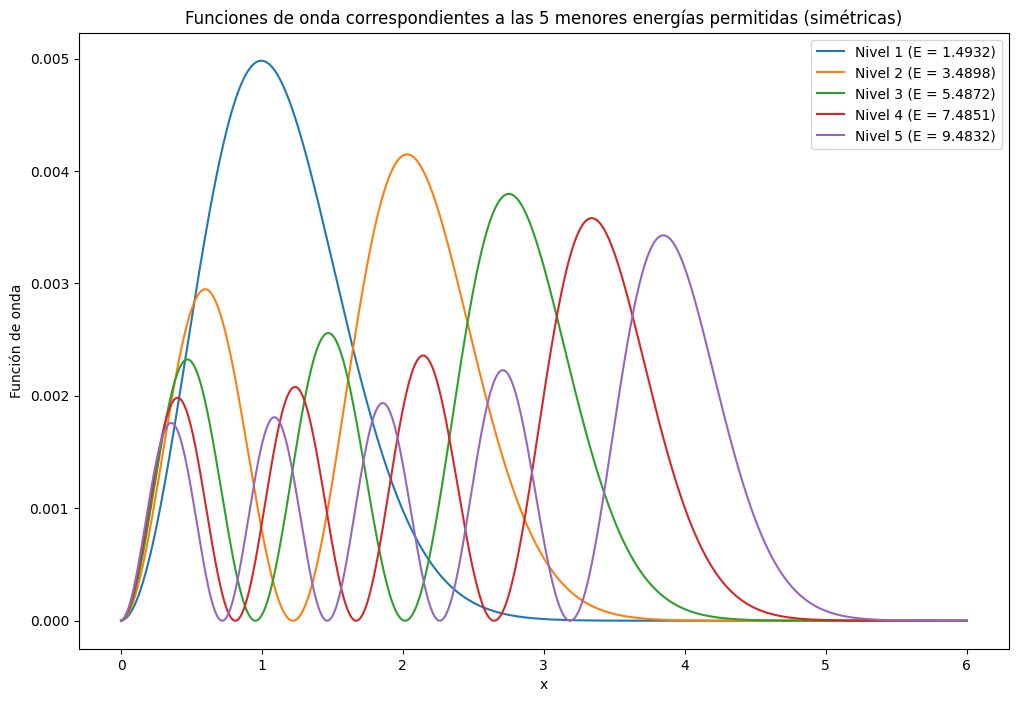

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh


num_puntos = 1000  # Número de puntos en la grilla
x_minimo = 0
x_maximo = 6
paso = (x_maximo - x_minimo) / (num_puntos - 1)  # Paso de la grilla
grilla_x = np.linspace(x_minimo, x_maximo, num_puntos)  # Puntos en la grilla

#Definimos la matriz de segunda derivada utilizando el método de Numerov
diag_principal = -2 * np.ones(num_puntos)
diag_adyacente = np.ones(num_puntos - 1)

#Construímos de la matriz tridiagonal L
matriz_L = diags([diag_adyacente, diag_principal, diag_adyacente], [-1, 0, 1], format='dense')
matriz_L = matriz_L / paso**2

#Definimos el operador matricial S para el caso simétrico
matriz_I_x2 = np.diag(grilla_x**2)
matriz_S = (matriz_I_x2 - matriz_L) / 2

#Resolvemos el problema de valores propios
valores_propios, vectores_propios = eigh(matriz_S)
indices_ordenados = np.argsort(valores_propios)
valores_propios_ordenados = valores_propios[indices_ordenados]
vectores_propios_ordenados = vectores_propios[:, indices_ordenados]

#Obtenemos las 5 menores energías permitidas
niveles = 5
energias_permitidas_simetrico = valores_propios_ordenados[:niveles]
vectores_funciones_simetricos = vectores_propios_ordenados[:, :niveles]

print("Las 5 menores energías permitidas (simétricas) son:", energias_permitidas_simetrico)

#Graficamos las funciones propias correspondientes a las 5 menores energías permitidas
plt.figure(figsize=(12, 8))
for i in range(niveles):
    plt.plot(grilla_x, vectores_funciones_simetricos[:, i]**2, label=f'Nivel {i+1} (E = {energias_permitidas_simetrico[i]:.4f})')

plt.xlabel('x')
plt.ylabel('Función de onda')
plt.title('Funciones de onda correspondientes a las 5 menores energías permitidas (simétricas)')
plt.legend()
plt.show()
